In [67]:
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import pandas as pd
import os
from scipy.spatial.distance import cdist 
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans 
from geopy.geocoders import Nominatim
import folium

# Cluster Sydney suburbs according to their local venues

Load files

In [68]:
aus_suburbs = pd.read_csv(os.path.join('aus_suburbs.csv'), index_col=0)
venues = pd.read_csv(os.path.join('venues.csv'), index_col=0)
venues_grouped = pd.read_csv(os.path.join('venues_grouped.csv'), index_col=0)
venues_sorted = pd.read_csv(os.path.join('venues_sorted.csv'), index_col=0)

Sort files

In [69]:
# Suburb data
sydney_suburbs = aus_suburbs.loc[aus_suburbs.City == 'Sydney']
# melbourne_suburbs = aus_suburbs.loc[aus_suburbs.City == 'Melbourne']
# canberra_suburbs = aus_suburbs.loc[aus_suburbs.City == 'Canberra']
# hobart_suburbs = aus_suburbs.loc[aus_suburbs.City == 'Hobart']
# adelaide_suburbs = aus_suburbs.loc[aus_suburbs.City == 'Adelaide']
# darwin_suburbs = aus_suburbs.loc[aus_suburbs.City == 'Darwin']
# perth_suburbs = aus_suburbs.loc[aus_suburbs.City == 'Perth']

In [70]:
# Venues
sydney_venues = venues.loc[venues.City == 'Sydney']
# melbourne_venues = top_venues.loc[top_venues.City == 'Melbourne']
# canberra_venues = top_venues.loc[top_venues.City == 'Canberra']
# hobart_venues = top_venues.loc[top_venues.City == 'Hobart']
# adelaide_venues = top_venues.loc[top_venues.City == 'Adelaide']
# darwin_venues = top_venues.loc[top_venues.City == 'Darwin']
# perth_venues = top_venues.loc[top_venues.City == 'Perth']

In [71]:
# Local venues grouped
sydney_venues_grouped = venues_grouped.loc[venues_grouped.City == 'Sydney']
# melbourne_venues_grouped = top_venues_grouped.loc[top_venues_grouped.City == 'Melbourne']
# canberra_venues_grouped = top_venues_grouped.loc[top_venues_grouped.City == 'Canberra']
# hobart_venues_grouped = top_venues_grouped.loc[top_venues_grouped.City == 'Hobart']
# adelaide_venues_grouped = top_venues_grouped.loc[top_venues_grouped.City == 'Adelaide']
# darwin_venues_grouped = top_venues_grouped.loc[top_venues_grouped.City == 'Darwin']
# perth_venues_grouped = top_venues_grouped.loc[top_venues_grouped.City == 'Perth']
sydney_venues_grouped.shape

(656, 455)

In [72]:
venues_grouped.loc[venues_grouped['City'] == 'Sydney']

Suburb_id             Suburb  Postcode  \
0            0         Abbotsbury      2176   
1            1         Abbotsford      2046   
2            2     Acacia Gardens      2763   
3            3        Agnes Banks      2753   
4            4              Airds      2560   
5            5         Alexandria      2015   
6            6      Alfords Point      2234   
7            7   Allambie Heights      2100   
8            8            Allawah      2218   
9            9          Ambarvale      2560   
10          10          Annandale      2038   
11          11         Annangrove      2156   
12          12            Arcadia      2159   
13          13          Arncliffe      2205   
14          14       Arndell Park      2148   
15          15           Artarmon      2064   
16          16            Ashbury      2193   
17          17           Ashcroft      2168   
18          18           Ashfield      2131   
19          19            Asquith      2077   
20          20             Auburn      2144   
21          21            Austral      2179   
22          22       Avalon Beach      2107   
23          23     Badgerys Creek      2555   
24          24          Balgowlah      2093   
25          25  Balgowlah Heights      2093   
26          26            Balmain      2041   
27          27       Balmain East      2041   
28          28             Bangor      2234   
29          29            Banksia      2216   
..         ...                ...       ...   
626        626      Windsor Downs      2756   
627        627      Winston Hills      2153   
628        628        Wolli Creek      2205   
629        629     Wollstonecraft      2065   
630        630           Woodbine      2560   
631        631          Woodcroft      2767   
632        632           Woodpark      2164   
633        633          Woollahra      2025   
634        634      Woolloomooloo      2011   
635        635         Woolooware      2230   
636        636           Woolwich      2110   
637        637           Woronora      2232   
638        638   Woronora Heights      2233   
639        639            Yagoona      2199   
640        640         Yarramundi      2753   
641        641        Yarrawarrah      2233   
642        642            Yennora      2161   
643        643          Yowie Bay      2228   
644        644            Zetland      2017   
645        645         Cornwallis      2756   
646        646        Forest Glen      2157   
647        647    Macquarie Links      2565   
648        648        Minchinbury      2770   
649        649   North Kellyville      2155   
650        650            Norwest      2153   
651        651       Picnic Point      2213   
652        652  Pitt Town Bottoms      2756   
653        653     Pleasure Point      2172   
654        654      South Windsor      2756   
655        655     Wisemans Ferry      2775   

                                                   LGA    City  \
0                                    City of Fairfield  Sydney   
1                                   City of Canada Bay  Sydney   
2                                    City of Blacktown  Sydney   
3                  City of Hawkesbury, City of Penrith  Sydney   
4                                City of Campbelltown   Sydney   
5                                       City of Sydney  Sydney   
6                                     Sutherland Shire  Sydney   
7                             Northern Beaches Council  Sydney   
8                                Georges River Council  Sydney   
9                                City of Campbelltown   Sydney   
10                                  Inner West Council  Sydney   
11                                     The Hills Shire  Sydney   
12                                       Hornsby Shire  Sydney   
13                                     Bayside Council  Sydney   
14                                   City of Blacktown  Sydney   
15                                

In [73]:
# Local venues sorted
sydney_venues_sorted = venues_sorted.loc[venues_sorted.City == 'Sydney']
# melbourne_venues_sorted = top_venues_sorted.loc[top_venues_sorted.City == 'Melbourne']
# canberra_venues_sorted = top_venues_sorted.loc[top_venues_sorted.City == 'Canberra']
# hobart_venues_sorted = top_venues_sorted.loc[top_venues_sorted.City == 'Hobart']
# adelaide_venues_sorted = top_venues_sorted.loc[top_venues_sorted.City == 'Adelaide']
# darwin_venues_sorted = top_venues_sorted.loc[top_venues_sorted.City == 'Darwin']
# perth_venues_sorted = top_venues_sorted.loc[top_venues_sorted.City == 'Perth']

# Get City of Sydney suburbs

In [74]:
# Drop columns where the venue category doesn't exist in the city
sydney_venues_grouped = sydney_venues_grouped.loc[:, (sydney_venues_grouped != 0).any(axis=0)]

# Check new dataframe size
sydney_venues_grouped.shape

(656, 333)

In [75]:
city_of_sydney = sydney_venues_grouped.loc[sydney_venues_grouped.LGA == 'City of Sydney']

# Standardise data

In [94]:
# Drop labelled columns
#data = sydney_top_venues_grouped.drop(columns=['Suburb_id', 'Suburb', 'Postcode', 'LGA', 'City'], axis=1)
data = city_of_sydney.drop(columns=['Suburb_id', 'Suburb', 'Postcode', 'LGA', 'City'], axis=1)

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_data = scaler.fit_transform(data)

data = pd.DataFrame(scaled_data, columns=data.columns)

/Users/Jason/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Jason/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Principle Component Analysis

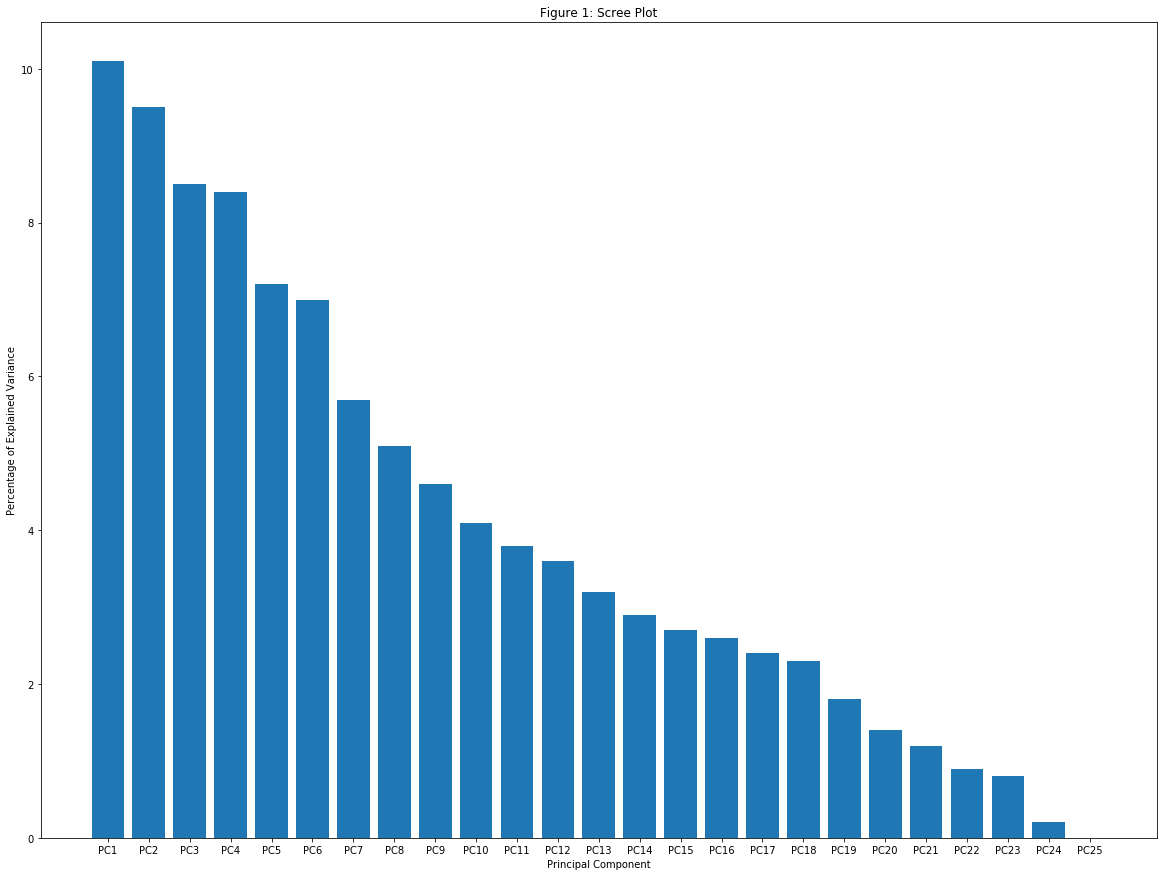

In [96]:
pca = PCA()
pca.fit(data)
pca_data = pca.transform(data)

percentage_variation = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(percentage_variation)+1)]

# Plot PCA percentage variation
plt.figure(figsize=(20,15))
plt.bar(x=range(1,len(percentage_variation)+1), height=percentage_variation, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Figure 1: Scree Plot')
plt.show()

### Find which principle component accounts up to 90% of the variation for all PC's

Convert histogram to cumulative distribution graph

In [97]:
cumulative = np.cumsum(percentage_variation)

In [98]:
id_perc_90 = np.where(cumulative > 90)[0][0]
id_perc_90

16

In [99]:
cumulative[id_perc_90]

91.4

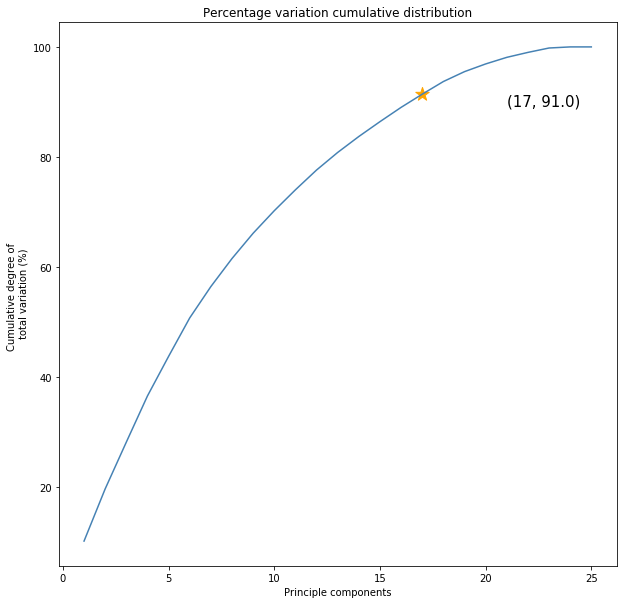

In [100]:
plt.figure(figsize=(10,10))
plt.plot(range(1,len(percentage_variation)+1), cumulative, c='steelblue')
plt.scatter(id_perc_90+1, cumulative[id_perc_90], marker='*', c='orange', s=200)
plt.title('Percentage variation cumulative distribution')
plt.xlabel('Principle components')
plt.ylabel('Cumulative degree of \n total variation (%)')
plt.annotate('({}, {})'.format(id_perc_90+1, round(cumulative[id_perc_90])), (id_perc_90+5, cumulative[id_perc_90]-2), size=15)
plt.show()

The cumulative distrubtion graph shows that principle components from PC1 to PC17 account for 90% of the variation for all PCs.

In [101]:
# Convert PCA data to a dataframe
pca_df = pd.DataFrame(pca_data, columns=labels)

# Drop columns PC154 and onwards
pca_df.drop(columns=[*labels[id_perc_90+1:]], axis=1, inplace=True)

# # Add labels to dataframe
# pca_df.insert(0, 'Suburb_id', sydney_top_venues_grouped.Suburb_id)
# pca_df.insert(1, 'Suburb', sydney_top_venues_grouped.Suburb)
# pca_df.insert(2, 'Postcode', sydney_top_venues_grouped.Postcode)
# pca_df.insert(3, 'LGA', sydney_top_venues_grouped.LGA)
# pca_df.insert(4, 'City', sydney_top_venues_grouped.City)

# Apply K-means clustering for City of Sydney suburbs

Finding the optimal K in k-means clustering with either **Distortion** method or **Inertia** method.

In [102]:
distortions = [] 
inertias = []
K = range(1,25) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(init = "k-means++", n_clusters=k, n_init = 20, max_iter=100)
    kmeanModel.fit(pca_df)     
      
    distortions.append(sum(np.min(cdist(pca_df, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / pca_df.shape[0]) 
    inertias.append(kmeanModel.inertia_) 

**Distortion**: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.

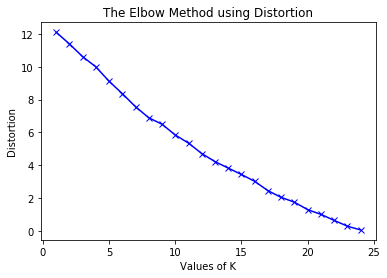

In [103]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

**Inertia**: It is the sum of squared distances of samples to their closest cluster center.

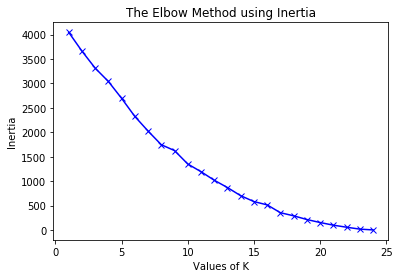

In [104]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

The inflection point with the Inertia is approximately 12.

In [116]:
kmeanModel = KMeans(init="k-means++", n_clusters=12, n_init = 20, max_iter=100)
kmeanModel.fit(pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=12, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [117]:
# Cluster labels
kclusters = kmeanModel.labels_
kclusters

array([ 6,  1,  0,  2, 11,  6,  7,  3,  6,  6,  6,  6,  9,  1,  5,  3, 10,
        6,  3,  8,  7,  6,  6,  3,  4], dtype=int32)

Add cluster labels to suburbs

In [118]:
# add clustering labels to suburb information
city_of_sydney_suburbs = sydney_suburbs.iloc[city_of_sydney.Suburb_id]
city_of_sydney_suburbs.insert(0, 'Cluster_Labels', kclusters)

In [119]:
city_of_sydney_suburbs.head()

Cluster_Labels  Suburb_id        Suburb  Postcode             LGA  \
5                 6          5    Alexandria      2015  City of Sydney   
32                1         32    Barangaroo      2000  City of Sydney   
41                0         41  Beaconsfield      2015  City of Sydney   
133               2        133   Chippendale      2008  City of Sydney   
172              11        172  Darlinghurst      2010  City of Sydney   

       City            State  Population        LAT         LON  distance  \
5    Sydney  New South Wales      8262.0 -33.908027  151.190258  4.425866   
32   Sydney  New South Wales       189.0 -33.863794  151.202230  0.914960   
41   Sydney  New South Wales       987.0 -33.910960  151.199950  4.513562   
133  Sydney  New South Wales      8617.0 -33.886300  151.199900  1.850781   
172  Sydney  New South Wales     11320.0 -33.878018  151.220444  1.450163   

                                              geometry   area       density  
5    {'type': 'MultiPolygon', 'coordinates': [[[[15...  3.435   2405.240175  
32   {'type': 'MultiPolygon', 'coordinates': [[[[15...  0.221    855.203620  
41   {'type': 'MultiPolygon', 'coordinates': [[[[15...  0.163   6055.214724  
133  {'type': 'MultiPolygon', 'coordinates': [[[[15...  0.452  19064.159292  
172  {'type': 'MultiPolygon', 'coordinates': [[[[15...  0.844  13412.322275

# Map City of Sydney suburbs according to cluster labels

In [120]:
address = "Sydney, New South Wales"

geolocator = Nominatim(user_agent="syd_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Sydney are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Sydney are -33.8536692, 151.2133527.


In [121]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(len(kclusters))
ys = [i + x + (i*x)**2 for i in range(len(kclusters))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, suburb, cluster in zip(city_of_sydney_suburbs.LAT, city_of_sydney_suburbs.LON, city_of_sydney_suburbs.Suburb, city_of_sydney_suburbs.Cluster_Labels):
    label = folium.Popup(str(suburb) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examine Clusters

In [122]:
# add clustering labels to top venues
city_of_sydney_venues = sydney_venues_sorted.iloc[city_of_sydney.Suburb_id]
city_of_sydney_venues.insert(0, 'Cluster_Labels', kclusters)
city_of_sydney_venues.drop(columns=['Suburb_id', 'City'], axis=1, inplace=True)

/Users/Jason/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [123]:
def get_suburbs_from_cluster(cluster_id):
    return city_of_sydney_venues.loc[city_of_sydney_venues['Cluster_Labels'] == cluster_id]

In [124]:
get_suburbs_from_cluster(0)

Cluster_Labels        Suburb  Postcode             LGA  \
41               0  Beaconsfield      2015  City of Sydney   

   1st Most Common Venue   2nd Most Common Venue 3rd Most Common Venue  \
41                  Café  Furniture / Home Store        Clothing Store   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
41          Liquor Store       Thai Restaurant    Miscellaneous Shop   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
41      Basketball Court           Pizza Place     Electronics Store   

   10th Most Common Venue  
41            Flea Market

In [125]:
get_suburbs_from_cluster(1)

Cluster_Labels         Suburb  Postcode             LGA  \
32                1     Barangaroo      2000  City of Sydney   
396               1  Millers Point      2000  City of Sydney   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
32                   Café                   Bar    Italian Restaurant   
396                  Café                   Pub                 Hotel   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
32             Restaurant                 Hotel    Seafood Restaurant   
396    Seafood Restaurant                  Park    Italian Restaurant   

    7th Most Common Venue       8th Most Common Venue  9th Most Common Venue  \
32      Indian Restaurant                         Pub                 Bakery   
396                Bakery  Modern European Restaurant  Performing Arts Venue   

    10th Most Common Venue  
32          Ice Cream Shop  
396     Turkish Restaurant

In [126]:
get_suburbs_from_cluster(2)

Cluster_Labels       Suburb  Postcode             LGA  \
133               2  Chippendale      2008  City of Sydney   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
133                  Café                   Bar                Bakery   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
133       Thai Restaurant                 Hotel                   Pub   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
133              Wine Bar          Cocktail Bar           Art Gallery   

    10th Most Common Venue  
133         Ice Cream Shop

In [127]:
get_suburbs_from_cluster(3)

Cluster_Labels           Suburb  Postcode             LGA  \
211               3    Elizabeth Bay      2011  City of Sydney   
482               3      Potts Point      2011  City of Sydney   
523               3  Rushcutters Bay      2011  City of Sydney   
634               3    Woolloomooloo      2011  City of Sydney   

    1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
211                  Café                  Park     Italian Restaurant   
482                  Café                 Hotel  Australian Restaurant   
523                  Café    Italian Restaurant                   Park   
634                  Café    Italian Restaurant                  Hotel   

     4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
211     Chinese Restaurant              Wine Bar       Thai Restaurant   
482     Italian Restaurant    Chinese Restaurant       Harbor / Marina   
523               Wine Bar       Thai Restaurant      Sushi Restaurant   
634  Australian Restaurant       Thai Restaurant                Hostel   

     7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
211  Australian Restaurant   Japanese Restaurant                   Bar   
482                  Trail                  Park            Restaurant   
523    Japanese Restaurant       Harbor / Marina                Hostel   
634     Chinese Restaurant                   Pub                   Bar   

    10th Most Common Venue  
211                  Hotel  
482       Community Center  
523            Pizza Place  
634             Restaurant

In [128]:
get_suburbs_from_cluster(4)

Cluster_Labels   Suburb  Postcode             LGA 1st Most Common Venue  \
644               4  Zetland      2017  City of Sydney                  Café   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
644                  Park   Japanese Restaurant           Pizza Place   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
644        Sandwich Place             BBQ Joint                Bakery   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
644          Liquor Store                   Gym     Seafood Restaurant

In [129]:
get_suburbs_from_cluster(5)

Cluster_Labels      Suburb  Postcode             LGA  \
405               5  Moore Park      2021  City of Sydney   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
405                  Park         Movie Theater        Cricket Ground   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
405           Event Space            Theme Park          Tram Station   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
405                   Gym      Basketball Court           Golf Course   

    10th Most Common Venue  
405          Shopping Mall

In [130]:
get_suburbs_from_cluster(6)

Cluster_Labels        Suburb  Postcode             LGA  \
5                 6    Alexandria      2015  City of Sydney   
173               6    Darlington      2008  City of Sydney   
225               6  Erskineville      2043  City of Sydney   
227               6      Eveleigh      2015  City of Sydney   
235               6  Forest Lodge      2037  City of Sydney   
245               6         Glebe      2037  City of Sydney   
497               6       Redfern      2016  City of Sydney   
585               6        Ultimo      2007  City of Sydney   
599               6      Waterloo      2017  City of Sydney   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
5                    Café    Italian Restaurant      Basketball Court   
173                  Café                   Bar                   Pub   
225                  Café                   Pub                Bakery   
227                  Café                   Pub                  Park   
235                  Café                   Pub           Pizza Place   
245                  Café                   Pub                   Bar   
497                  Café                   Bar                   Pub   
585                  Café                   Bar        Ice Cream Shop   
599                  Café                   Gym                  Park   

     4th Most Common Venue          5th Most Common Venue  \
5            Grocery Store          Australian Restaurant   
173        Thai Restaurant                         Bakery   
225                   Park                         Bistro   
227            Pizza Place          Performing Arts Venue   
235  Portuguese Restaurant  Paper / Office Supplies Store   
245     Italian Restaurant             Seafood Restaurant   
497                   Park                    Pizza Place   
585    Dumpling Restaurant                          Hotel   
599        Thai Restaurant                    Art Gallery   

     6th Most Common Venue 7th Most Common Venue        8th Most Common Venue  \
5                      NaN                   NaN                          NaN   
173     Italian Restaurant      Ramen Restaurant                  Bus Station   
225                    Bar         Train Station                          Gym   
227  Australian Restaurant              Beer Bar                       Market   
235        Harbor / Marina       Thai Restaurant              Motorcycle Shop   
245          Grocery Store                Bakery  Eastern European Restaurant   
497         Breakfast Spot               Theater         Pakistani Restaurant   
585            Supermarket               Brewery                          Gym   
599            Pizza Place              Wine Bar          Japanese Restaurant   

    9th Most Common Venue 10th Most Common Venue  
5                     NaN                    NaN  
173           Event Space            Beer Garden  
225           Men's Store                Theater  
227        Used Bookstore                 Office  
235      Sushi Restaurant   Gym / Fitness Center  
245           Pizza Place    Japanese Restaurant  
497                Lounge         Gymnastics Gym  
585      Basketball Court                 Lounge  
599         Grocery Store                    NaN

In [131]:
get_suburbs_from_cluster(7)

Cluster_Labels       Suburb  Postcode             LGA  \
175               7  Dawes Point      2000  City of Sydney   
578               7    The Rocks      2000  City of Sydney   

    1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
175                  Café                   Pub  Australian Restaurant   
578                  Café                 Hotel  Australian Restaurant   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
175               Brewery                 Hotel    Italian Restaurant   
578                   Pub             Hotel Bar    Italian Restaurant   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
175   Japanese Restaurant                  Park    Seafood Restaurant   
578            Steakhouse                  Park          Cocktail Bar   

    10th Most Common Venue  
175                 Museum  
578         Scenic Lookout

In [132]:
get_suburbs_from_cluster(8)

Cluster_Labels       Suburb  Postcode             LGA  \
565               8  Surry Hills      2010  City of Sydney   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
565                  Café                   Pub           Pizza Place   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
565   Japanese Restaurant        Breakfast Spot   Lebanese Restaurant   

     7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
565  Vietnamese Restaurant       Thai Restaurant           Karaoke Bar   

    10th Most Common Venue  
565      Indian Restaurant

In [133]:
get_suburbs_from_cluster(9)

Cluster_Labels     Suburb  Postcode             LGA  \
279               9  Haymarket      2000  City of Sydney   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
279       Thai Restaurant                  Café    Chinese Restaurant   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
279     Korean Restaurant   Japanese Restaurant        Ice Cream Shop   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
279                Hostel      Malay Restaurant     Hotpot Restaurant   

    10th Most Common Venue  
279                  Hotel

In [134]:
get_suburbs_from_cluster(10)

Cluster_Labels   Suburb  Postcode             LGA 1st Most Common Venue  \
489              10  Pyrmont      2009  City of Sydney                  Café   

    2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
489                   Bar  Australian Restaurant        Breakfast Spot   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
489     French Restaurant   Japanese Restaurant                   Pub   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
489            Restaurant                  Park    Dumpling Restaurant

In [135]:
get_suburbs_from_cluster(11)

Cluster_Labels        Suburb  Postcode             LGA  \
172              11  Darlinghurst      2010  City of Sydney   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
172                  Café    Italian Restaurant                   Bar   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
172                   Pub   Japanese Restaurant           Pizza Place   

     7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
172  Vietnamese Restaurant       Thai Restaurant                   Gym   

    10th Most Common Venue  
172           Cocktail Bar